# Alternative Evaluation for YAP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context('talk')
sns.set_style("white")
sns.set_palette('Set2', 10)
%matplotlib inline

In [2]:
gold_file = "dev.hebtb.lgold.conll"
joint_file = "joint.arc.zeager.i50.dev.hebtb.uninf.conll"
goldpipe_file = "pipeline.zeager.i32.dev.hebtb.lgold.conll"
pipe_file = "pipeline.zeager.i32.dev.hebtb.uninf.i28.conll"

def make_conll_df(path):
    # CoNLL file is tab delimeted with no quoting
    # quoting=3 is csv.QUOTE_NONE
    df = (pd.read_csv(path, sep='\t', header=None, quoting=3, 
                names = ['ID', 'FORM', 'LEMMA', 'UPOS', 'XPOS', 'FEATS', 'HEAD', 'DEPREL', 'DEPS', 'MISC'])
                # add sentence labels
                .assign(sent = lambda x: (x.ID==1).cumsum())
                # replace bad root dependency tags
                .replace({'DEPREL': {'prd': 'ROOT'}})
               )
    
    df = df.merge(df[['ID', 'FORM', 'sent', 'UPOS']].rename(index=str, columns={'FORM': 'head_form', 'UPOS': 'head_upos'}).set_index(['sent', 'ID']),
               left_on=['sent', 'HEAD'], right_index=True, how='left')
    return df

gold, joint, goldpipe, pipe  = map(make_conll_df, [gold_file, joint_file, goldpipe_file, pipe_file])

In [3]:
gold.head(30)

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
0,1,עשרות,עשר,CDT,CDT,gen=F|num=P,2,num,_,_,1,אנשים,NN
1,2,אנשים,איש,NN,NN,gen=M|num=P,3,subj,_,_,1,מגיעים,BN
2,3,מגיעים,הגיע,BN,BN,gen=M|num=P|per=A,0,ROOT,_,_,1,NaN,NaN
3,4,מ,מ,PREPOSITION,PREPOSITION,_,3,prepmod,_,_,1,מגיעים,BN
4,5,תאילנד,תאילנד,NNP,NNP,_,4,pobj,_,_,1,מ,PREPOSITION
5,6,ל,ל,PREPOSITION,PREPOSITION,_,3,prepmod,_,_,1,מגיעים,BN
6,7,ישראל,ישראל,NNP,NNP,_,6,pobj,_,_,1,ל,PREPOSITION
7,8,כש,כש,TEMP,TEMP,_,3,ccomp,_,_,1,מגיעים,BN
8,9,הם,הוא,PRP,PRP,gen=M|num=P|per=3,10,subj,_,_,1,נרשמים,BN
9,10,נרשמים,נרשם,BN,BN,gen=M|num=P|per=A,14,conj,_,_,1,אך,CC


In [4]:
joint.head()

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
0,1,עשרות,NaN,CDT,CDT,NaN,2,num,_,_,1,אנשים,NN
1,2,אנשים,NaN,NN,NN,NaN,3,subj,_,_,1,מגיעים,BN
2,3,מגיעים,NaN,BN,BN,NaN,14,conj,_,_,1,אך,CC
3,4,מ,NaN,PREPOSITION,PREPOSITION,NaN,3,comp,_,_,1,מגיעים,BN
4,5,תאילנד,NaN,NNP,NNP,NaN,4,pobj,_,_,1,מ,PREPOSITION


In [5]:
goldpipe.head()

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
0,1,עשרות,_,CDT,CDT,gen=F|num=P,2,num,_,_,1,אנשים,NN
1,2,אנשים,_,NN,NN,gen=M|num=P,3,subj,_,_,1,מגיעים,BN
2,3,מגיעים,_,BN,BN,gen=M|num=P|per=A,14,conj,_,_,1,אך,CC
3,4,מ,_,PREPOSITION,PREPOSITION,_,3,prepmod,_,_,1,מגיעים,BN
4,5,תאילנד,_,NNP,NNP,_,4,pobj,_,_,1,מ,PREPOSITION


In [6]:
pipe.head()

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
0,1,עשרות,_,CDT,CDT,gen=F|num=P,2,num,_,_,1,אנשים,NN
1,2,אנשים,_,NN,NN,gen=M|num=P,3,subj,_,_,1,מגיעים,BN
2,3,מגיעים,_,BN,BN,gen=M|num=P|per=A,14,conj,_,_,1,אך,CC
3,4,מ,_,PREPOSITION,PREPOSITION,_,3,comp,_,_,1,מגיעים,BN
4,5,תאילנד,_,NNP,NNP,gen=F|num=S,4,pobj,_,_,1,מ,PREPOSITION


In [7]:
gold.groupby('sent').size().describe()

count    500.000000
mean      22.602000
std       13.687596
min        2.000000
25%       13.000000
50%       21.000000
75%       30.000000
max      100.000000
dtype: float64

Check mean sentence length

In [8]:
gold.groupby('sent').size().mean(), joint.groupby('sent').size().mean(), goldpipe.groupby('sent').size().mean(), pipe.groupby('sent').size().mean()

(22.602, 22.884, 22.602, 22.944)

## Evaluate

Handwavy pseudo-algorithm
```
1. points = 0
1. For each sentence
    1. g <- set(gold[FORM, UPOS, DEPREL, head_form])
    1. t <- set(test[FORM, UPOS, DEPREL, head_form])
    1. points += len(g.intersection(t)) / avg(len(gold, test))```
   
Or in words - for each test sentence, get the number of correct tags using set intersection with the gold sentence, and then normalize by the sentence length.

The current normalization uses the avg length of the sentences between g and t

In [9]:
EVAL_COLS = ['FORM', 'UPOS', 'DEPREL', 'head_form']

def score(t, g = gold, columns = EVAL_COLS):
    sent = t.iloc[0,10]
    # get the correct gold sentence
    g = g[g.sent==sent]
    
    # value for normalization
    norm = (t.shape[0] + g.shape[0]) / 2
    
    #use pandas index set logic to get the intersection
    g = g.set_index(columns)
    t = t.set_index(columns)
    
    return len(g.index.intersection(t.index)) / norm

In [10]:
jnt_scores = joint.groupby('sent').apply(score)
jnt_scores.describe()

count    500.000000
mean       0.692607
std        0.188760
min        0.000000
25%        0.578789
50%        0.714286
75%        0.827586
max        1.000000
dtype: float64

In [11]:
gldp_scores = goldpipe.groupby('sent').apply(score)
gldp_scores.describe()

count    500.000000
mean       0.804209
std        0.144225
min        0.000000
25%        0.729895
50%        0.824808
75%        0.903226
max        1.000000
dtype: float64

In [12]:
pipe_scores = pipe.groupby('sent').apply(score)
pipe_scores.describe()

count    500.000000
mean       0.681330
std        0.188130
min        0.000000
25%        0.571429
50%        0.692308
75%        0.808511
max        1.000000
dtype: float64

### Error analysis

In [13]:
jnt_scores[jnt_scores<0.2]

sent
155    0.000000
255    0.133333
311    0.076923
312    0.000000
313    0.181818
424    0.133333
dtype: float64

In [14]:
joint[joint.sent==155]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
3915,1,גם,NaN,RB,RB,NaN,0,ROOT,_,_,155,NaN,NaN
3916,2,אני,NaN,PRP,PRP,NaN,3,mwe,_,_,155,לא,RB
3917,3,לא,NaN,RB,RB,NaN,1,neg,_,_,155,גם,RB
3918,4,.,NaN,yyDOT,yyDOT,NaN,1,punct,_,_,155,גם,RB


In [15]:
gold[gold.sent==155]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
3889,1,גם,גם,RB,RB,_,2,det,_,_,155,אני,PRP
3890,2,אני,הוא,PRP,PRP,gen=F|gen=M|num=S|per=1,0,hd,_,_,155,NaN,NaN
3891,3,לא,לא,RB,RB,_,2,neg,_,_,155,אני,PRP
3892,4,.,_,yyDOT,yyDOT,_,2,punct,_,_,155,אני,PRP


In [16]:
joint[joint.sent==312]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
7860,1,"""",NaN,yyQUOT,yyQUOT,NaN,0,ROOT,_,_,312,NaN,NaN
7861,2,מדוע,NaN,QW,QW,NaN,5,mod,_,_,312,"""",yyQUOT
7862,3,לא,NaN,RB,RB,NaN,5,mod,_,_,312,"""",yyQUOT
7863,4,?,NaN,yyQM,yyQM,NaN,5,mod,_,_,312,"""",yyQUOT
7864,5,"""",NaN,yyQUOT,yyQUOT,NaN,1,nn,_,_,312,"""",yyQUOT
7865,6,",",NaN,yyCM,yyCM,NaN,1,punct,_,_,312,"""",yyQUOT
7866,7,ש,NaN,REL,REL,NaN,1,rcmod,_,_,312,"""",yyQUOT
7867,8,אל,NaN,MD,MD,NaN,7,relcomp,_,_,312,ש,REL
7868,9,.,NaN,yyDOT,yyDOT,NaN,1,punct,_,_,312,"""",yyQUOT


In [17]:
gold[gold.sent==312]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
7779,1,"""",_,yyQUOT,yyQUOT,_,7,dep,_,_,312,שאל,VB
7780,2,מדוע,מדוע,QW,QW,_,1,hd,_,_,312,"""",yyQUOT
7781,3,לא,לא,RB,RB,_,2,neg,_,_,312,מדוע,QW
7782,4,?,_,yyQM,yyQM,_,2,punct,_,_,312,מדוע,QW
7783,5,"""",_,yyQUOT,yyQUOT,_,1,punct,_,_,312,"""",yyQUOT
7784,6,",",_,yyCM,yyCM,_,7,punct,_,_,312,שאל,VB
7785,7,שאל,שאל,VB,VB,gen=M|num=S|per=3|tense=PAST,0,ROOT,_,_,312,NaN,NaN
7786,8,.,_,yyDOT,yyDOT,_,7,punct,_,_,312,שאל,VB


#### Sentence length

Text(0,0.5,'Score')

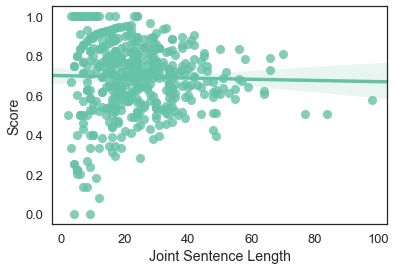

In [18]:
joint_sent_len = joint.groupby('sent').size()
ax = sns.regplot(x=joint_sent_len, y=jnt_scores)
ax.set_xlabel('Joint Sentence Length')
ax.set_ylabel('Score')

Text(0,0.5,'Score')

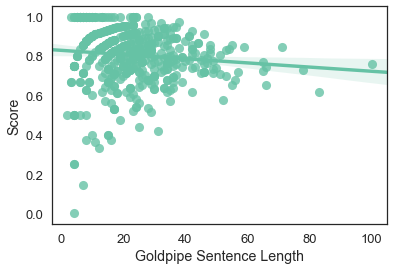

In [19]:
gldp_sent_len = goldpipe.groupby('sent').size()
ax = sns.regplot(x=gldp_sent_len, y=gldp_scores)
ax.set_xlabel('Goldpipe Sentence Length')
ax.set_ylabel('Score')

Text(0,0.5,'Score')

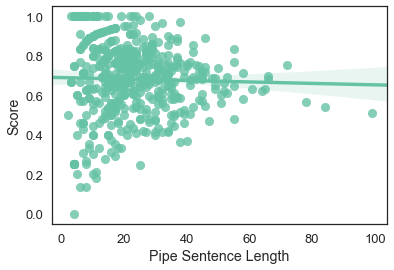

In [20]:
pipe_sent_len = pipe.groupby('sent').size()
ax = sns.regplot(x=pipe_sent_len, y=pipe_scores)
ax.set_xlabel('Pipe Sentence Length')
ax.set_ylabel('Score')

#### Sentence length diff

Text(0.5,1,'Sentence Length Diff')

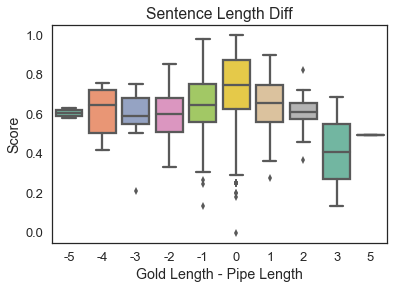

In [21]:
gold_sent_len = gold.groupby('sent').size()
ax = sns.boxplot(x=gold_sent_len - pipe_sent_len, y=pipe_scores)
ax.set_xlabel('Gold Length - Pipe Length')
ax.set_ylabel('Score')
ax.set_title('Sentence Length Diff')

Text(0.5,1,'Sentence Length Diff')

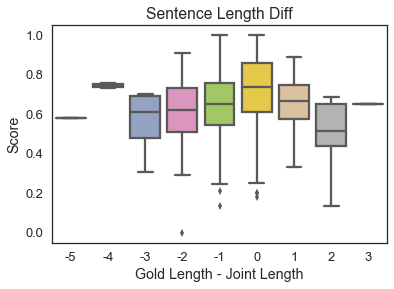

In [22]:
ax = sns.boxplot(x=gold_sent_len - joint_sent_len, y=pipe_scores)
ax.set_xlabel('Gold Length - Joint Length')
ax.set_ylabel('Score')
ax.set_title('Sentence Length Diff')

### Punctuation

#### Correlate punctuation and score

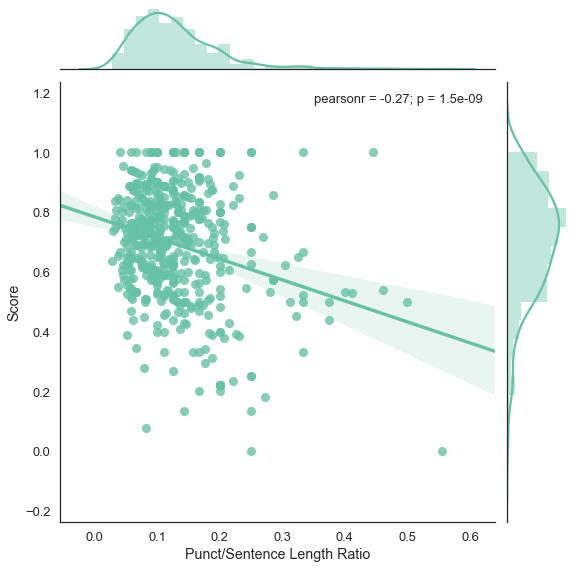

In [23]:
joint['puncts'] = joint.UPOS.str.startswith('yy')
joint_pnct_ratio = joint.groupby('sent').puncts.sum() / joint.groupby('sent').size()

g = (sns.jointplot(x=joint_pnct_ratio, y=jnt_scores, kind="reg", size=8, ratio=6)
     .set_axis_labels("Punct/Sentence Length Ratio", "Score"))

There is a negative correlation here. Next lets try to remove punctuation and re-evaluate the score.

#### Remove punctuation chars and re-evaluate

In [24]:
def depunct(df):
    new_df = df.fillna({'head_upos': '___', 'head_form': '___'}).copy()
    new_df = new_df[~new_df.UPOS.str.startswith('yy')]
    new_df.loc[new_df['head_upos'].str.startswith('yy', na=False), 'head_form'] = '___'
    return new_df

pipe_nop = depunct(pipe)
gold_nop = depunct(gold)
gldp_nop = depunct(goldpipe)
jnt_nop = depunct(joint)


In [25]:
gold_nop[gold_nop.sent==155]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
3889,1,גם,גם,RB,RB,_,2,det,_,_,155,אני,PRP
3890,2,אני,הוא,PRP,PRP,gen=F|gen=M|num=S|per=1,0,hd,_,_,155,___,___
3891,3,לא,לא,RB,RB,_,2,neg,_,_,155,אני,PRP


In [26]:
gold[gold.sent==155]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
3889,1,גם,גם,RB,RB,_,2,det,_,_,155,אני,PRP
3890,2,אני,הוא,PRP,PRP,gen=F|gen=M|num=S|per=1,0,hd,_,_,155,NaN,NaN
3891,3,לא,לא,RB,RB,_,2,neg,_,_,155,אני,PRP
3892,4,.,_,yyDOT,yyDOT,_,2,punct,_,_,155,אני,PRP


In [27]:
gold_nop[gold_nop.sent==312]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
7780,2,מדוע,מדוע,QW,QW,_,1,hd,_,_,312,___,yyQUOT
7781,3,לא,לא,RB,RB,_,2,neg,_,_,312,מדוע,QW
7785,7,שאל,שאל,VB,VB,gen=M|num=S|per=3|tense=PAST,0,ROOT,_,_,312,___,___


In [28]:
gold[gold.sent==312]

,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC,sent,head_form,head_upos
7779,1,"""",_,yyQUOT,yyQUOT,_,7,dep,_,_,312,שאל,VB
7780,2,מדוע,מדוע,QW,QW,_,1,hd,_,_,312,"""",yyQUOT
7781,3,לא,לא,RB,RB,_,2,neg,_,_,312,מדוע,QW
7782,4,?,_,yyQM,yyQM,_,2,punct,_,_,312,מדוע,QW
7783,5,"""",_,yyQUOT,yyQUOT,_,1,punct,_,_,312,"""",yyQUOT
7784,6,",",_,yyCM,yyCM,_,7,punct,_,_,312,שאל,VB
7785,7,שאל,שאל,VB,VB,gen=M|num=S|per=3|tense=PAST,0,ROOT,_,_,312,NaN,NaN
7786,8,.,_,yyDOT,yyDOT,_,7,punct,_,_,312,שאל,VB


In [29]:
jnt_nop_score = jnt_nop.groupby('sent').apply(score, g=gold_nop)
jnt_nop_score.describe()

count    500.000000
mean       0.689990
std        0.202754
min        0.000000
25%        0.585092
50%        0.717670
75%        0.833333
max        1.000000
dtype: float64

In [30]:
gldp_nop_score = gldp_nop.groupby('sent').apply(score, g=gold_nop)
gldp_nop_score.describe()

count    500.000000
mean       0.805194
std        0.150818
min        0.000000
25%        0.741796
50%        0.833333
75%        0.900000
max        1.000000
dtype: float64

In [31]:
pipe_nop_score = pipe_nop.groupby('sent').apply(score, g=gold_nop)
pipe_nop_score.describe()

count    500.000000
mean       0.672378
std        0.203472
min        0.000000
25%        0.562500
50%        0.697322
75%        0.800000
max        1.000000
dtype: float64

#### High scoring with segmentation errors

In [36]:
pipe_nop_score[(pipe_nop_score>0.9) & (pipe_nop.groupby('sent').size()!=gold_nop.groupby('sent').size())]

sent
134    0.943396
346    0.920635
379    0.978723
dtype: float64

In [37]:

pd.concat([pipe_nop.loc[pipe_nop.sent==379, EVAL_COLS].set_index(np.arange(pipe_nop[pipe_nop.sent==379].shape[0])),
           gold_nop.loc[gold_nop.sent==379, EVAL_COLS].set_index(np.arange(gold_nop[gold_nop.sent==379].shape[0]))], 
            axis=1, keys=['pipe', 'gold'])

pipe                                          gold               \
          FORM         UPOS   DEPREL   head_form        FORM         UPOS   
0       מומחים           NN     subj      העריכו      מומחים           NN   
1     פוליטיים           JJ     amod      מומחים    פוליטיים           JJ   
2            ב  PREPOSITION  prepmod      מומחים           ב  PREPOSITION   
3            ה          DEF      def     מינסוטה     מינסוטה          NNP   
4      מינסוטה          NNP     pobj           ב      העריכו           VB   
5       העריכו           VB     ROOT         ___           ב  PREPOSITION   
6            ב  PREPOSITION  prepmod      העריכו         יום          NNT   
7          יום          NNT     pobj           ב           ד          NNP   
8            ד          NNP     gobj         יום          כי           CC   
9           כי           CC     comp      העריכו           ה          DEF   
10           ה          DEF      def       התקפה       התקפה           NN   
11       התקפה           NN     subj        היתה          על           IN   
12          על           IN  prepmod       התקפה  נאמנויותיו           NN   
13  נאמנויותיו           NN     pobj          על           ה          DEF   
14           ה          DEF      def       דתיות       דתיות           JJ   
15       דתיות           JJ     amod  נאמנויותיו          של          POS   
16          של          POS      gen  נאמנויותיו     וולסטון          NNP   
17     וולסטון          NNP     gobj          של        היתה          COP   
18        היתה          COP    ccomp          כי        גורם           NN   
19        גורם           NN     ROOT        היתה       מרכזי           JJ   
20       מרכזי           JJ     amod        גורם           ב  PREPOSITION   
21           ב  PREPOSITION  prepmod        גורם       תבוסת          NNT   
22       תבוסת          NNT     pobj           ב     בושוויץ          NNP   
23     בושוויץ          NNP     gobj       תבוסת         NaN          NaN   

                         
     DEPREL   head_form  
0      subj      העריכו  
1      amod      מומחים  
2   prepmod      מומחים  
3      pobj           ב  
4      ROOT         ___  
5   prepmod      העריכו  
6      pobj           ב  
7      gobj         יום  
8      comp      העריכו  
9       def       התקפה  
10     subj        היתה  
11  prepmod       התקפה  
12     pobj          על  
13      def       דתיות  
14     amod  נאמנויותיו  
15      gen  נאמנויותיו  
16     gobj          של  
17    ccomp          כי  
18     ROOT        היתה  
19     amod        גורם  
20  prepmod        גורם  
21     pobj           ב  
22     gobj       תבוסת  
23      NaN         NaN

Nice!

There is only one segmentation error in position 3, and this is how the score gets it too.